In [1]:
from glider import Glider

In [2]:
import random
import math

g = Glider()
a = g.get_state()
print(g.x_dot)
print(a)
reward = 0
X = []
H = []
V = []
num_steps = 20000
for i in range(num_steps):
    if i < 350:
        g.phi = -0.7
        # action = 0.1 # random.randint(0,10)/10.0 - 0.5
    elif i < 400:
        g.phi = -0.1
    else:
        g.phi = 0.0
        
    action = 0
    # print(action)
    # if g.phi > 0:
    #    print('step: '+str(i)+', \t phi = ' + str(g.phi))
    reward, done = g.step(action)
    state = g.get_state()
    H.append(state[2])
    X.append(state[0])
    V.append(math.sqrt(state[1]**2 + state[3]**2))
    
    if i%100 == 0:
        print('step: ' + str(i) + ', \t y = ' + str(state[2]) + ', \t x = ' + str(state[0]) + '\t phi = ' + str(g.phi))
        print('Lift: ' + str(g.lift) +', \t Drag: ' + str(g.drag) + '\t Velocity: ' + str(math.sqrt(g.x_dot**2 + g.y_dot**2)) + '\n')
    if done == True:
        print('step: ' + str(i) + ', \t y = ' + str(state[2]) + ', \t x = ' + str(state[0]) + '\t Velocity: ' + str(math.sqrt(g.x_dot**2 + g.y_dot**2)) +'\n')
        break

10.0
[0.0, 10.0, 100.0, 0.0, 0.0]
step: 0, 	 y = 100.0, 	 x = 0.1	 phi = -0.7
Lift: 0.2526384683989369, 	 Drag: 0.033169810765017904	 Velocity: 10.0

step: 100, 	 y = 94.91104016507619, 	 x = 9.8295321181374	 phi = -0.7
Lift: 1.06108038436605, 	 Drag: 0.5851141573048347	 Velocity: 14.148920433629208

step: 200, 	 y = 78.641688295029, 	 x = 20.063768546567367	 phi = -0.7
Lift: 3.383647064301246, 	 Drag: 5.949961402043653	 Velocity: 25.252276131673845

step: 300, 	 y = 51.08024111308232, 	 x = 36.37865176719265	 phi = -0.7
Lift: 8.028722199377066, 	 Drag: 33.49938982927143	 Velocity: 38.74023237250116

step: 400, 	 y = 27.776511710093256, 	 x = 70.02067284192213	 phi = 0.0
Lift: 7.951982074276814, 	 Drag: 32.86206263194243	 Velocity: 38.532831293843294

step: 500, 	 y = 23.47160142160651, 	 x = 104.12669314620258	 phi = 0.0
Lift: 5.124904729462592, 	 Drag: 13.649464931032796	 Velocity: 31.510093039937544

step: 600, 	 y = 23.92434321910752, 	 x = 133.43724731876642	 phi = 0.0
Lift: 3.833

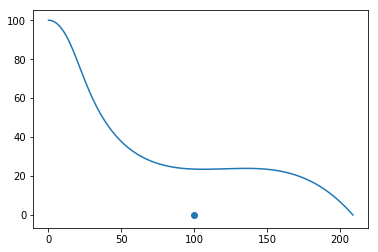

In [3]:
import matplotlib.pyplot as plt
plt.plot(X,H)
# plt.plot(X,H,c = V)
plt.scatter(100,0)
plt.show()

In [ ]:
import numpy as np
v = np.linspace(-5,5, num = 11, endpoint=False)

In [ ]:
import numpy as np
v = np.linspace(-5,5, num = 11, endpoint=False)
print(v)
a =np.digitize(4.5, v)
print(a)

In [ ]:
x_dot

In [ ]:
random.randint(1,2)

In [ ]:
math.sin(-1)

In [ ]:
g.phi

In [ ]:
math.atan(1)

In [ ]:
math.pi

In [ ]:
X = []
Y = []
for i in range(-5,30):
    # print(i)
    X.append(i)
    Y.append(Lift(i/180*math.pi,1, 0))
plt.plot(X,Y)
plt.show()

In [ ]:
Y

In [ ]:
math.sgn(1)

In [ ]:
import numpy as np
a = np.power(0.9,43)
print(a)

In [ ]:
import math

class Glider:
    def __init__(self, mass = 1.0, A = 1.0, C_L = 1.0, C_D = 1.0, h = 100.0, phi = -0.1, delta_t = 0.1, target_x = 100):
        self.gravity = 9.81
        self.rho = 1.225
        self.mass = mass
        self.A = A
        self.C_L = C_L
        self.C_D = C_D
        self.h = h
        self.h_init = h
        self.x = 0
        self.phi = phi
        self.vel = math.sqrt(self.mass*self.gravity/(0.5*self.rho*self.C_D*self.A)*math.sin(-self.phi))   
        self.delta_t = delta_t
        self.target_x = target_x
   
    def show_v(self):
        return self.vel
    
    def step(self, action):
        eps = 1e-6
        done = False
        reward = -abs(self.h - self.h_init*(self.target_x-self.x)/self.target_x)
        self.phi = min(-eps, self.phi + 0.001*action)
        h0 = self.h
        x0 = self.x
        self.h = h0 + math.sin(self.phi)*self.vel
        if self.h <= 0.0:
            self.x = x0 + math.cos(self.phi)*self.vel*h0/((h0-self.h)+eps)
            self.h = 0.0
            self.vel = 0.0
            done = True
            reward = reward - abs(self.x - self.target_x)
        else:
            self.x = x0 + math.cos(self.phi)*self.vel
            self.vel = math.sqrt(self.mass*self.gravity/(0.5*self.rho*self.C_D*self.A)*math.sin(-self.phi))
        return reward, done
    
    def get_state(self):
        return [self.h, self.x]
        